### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#PART A: Data Wrangling

# read in data
student_academic = pd.read_csv("student_academic.csv")
student_activities = pd.read_csv("student_activities.csv")

# shape
print(f"student_academic shape: {student_academic.shape}")
print(f"student_activities shape: {student_activities.shape}")
print()

# dtypes
print(f"student_academic dtypes:\n{student_academic.dtypes}")
print()
print(f"student_activities dtypes:\n{student_activities.dtypes}")
print()

# handle missing values
# student_academic
numerical_cols = ['GPA_Sem1', 'GPA_Sem2', 'Credits_Enrolled', 'Hours_Study', 'AttendanceRate']
student_academic[numerical_cols] = student_academic[numerical_cols].fillna(student_academic[numerical_cols].mean())

categorical_cols = ['Major', 'ClassYear', 'Scholarship']
for col in categorical_cols:
    student_academic[col] = student_academic[col].fillna(student_academic[col].mode()[0])

# student_activities
student_activities['HoursPerWeek'].fillna(student_activities['HoursPerWeek'].mean())
student_activities['Activity'].fillna('Unknown')
student_activities['LeadershipRole'].fillna(student_activities['LeadershipRole'].mode()[0])

'''
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

- for numerical data (GPA, credits, study hours), I am filling missing values with the mean, which would avoid
biasing the data too heavily.
- For categorical data (e.g., activity names), I filled in missing values with "Unknown" or the mode.
'''

# add GPA_change
student_academic['GPA_change'] = student_academic['GPA_Sem2'] - student_academic['GPA_Sem1']

# add StudyIntensity
student_academic['StudyIntensity'] = student_academic['Hours_Study'] / student_academic['Credits_Enrolled']

# add AttendanceFlag
attendance_flags = []
for rate in student_academic['AttendanceRate']:
    if rate >= 0.90:
        attendance_flags.append(1)
    else:
        attendance_flags.append(0)

student_academic['AttendanceFlag'] = attendance_flags


student_academic shape: (250, 9)
student_activities shape: (364, 4)

student_academic dtypes:
StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object

student_activities dtypes:
StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object



---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

In [ ]:
# You can break this cell up if you prefer.

# merge dataframes
student = pd.merge(student_academic, student_activities, on='StudentID', how='left')
unique_student = student.drop_duplicates(subset='StudentID')

'''
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
'''

In [28]:
# 1. GPA shift
top_improvers = unique_student.sort_values('GPA_change', ascending=False).head(10)
print(top_improvers[['StudentID', 'GPA_change']])

'''
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
'''

     StudentID  GPA_change
116       1072        1.45
345       1203        1.42
152       1093        1.38
349       1205        1.37
383       1223        1.24
329       1194        1.16
297       1179        1.13
52        1035        1.12
102       1063        1.05
228       1138        1.04


'\nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html\n'

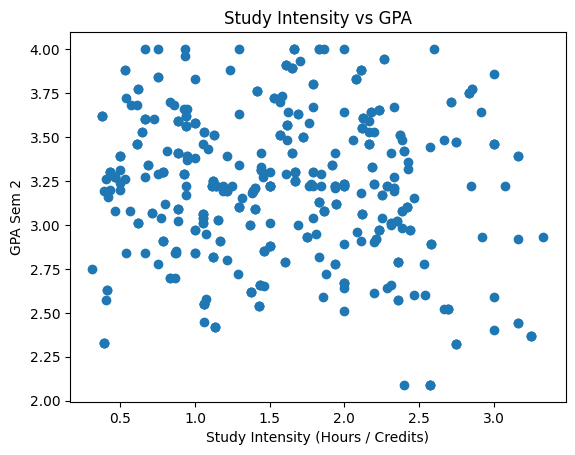

Pearson correlation: -0.106


'\nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html\n'

In [29]:
# 2. study habits
# scatter plot
plt.scatter(student['StudyIntensity'], student['GPA_Sem2'])
plt.xlabel('Study Intensity (Hours / Credits)')
plt.ylabel('GPA Sem 2')
plt.title('Study Intensity vs GPA')
plt.show()

# pearson correlation
corr = student['StudyIntensity'].corr(student['GPA_Sem2'])
print(f"Pearson correlation: {corr:.3f}")

'''
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
'''

Scholarship Students:
Mean GPA: 3.255196638655462
Std GPA: 0.38497147300574114

Non-Scholarship Students:
Mean GPA: 3.1865339366515837
Std GPA: 0.4303399179371596


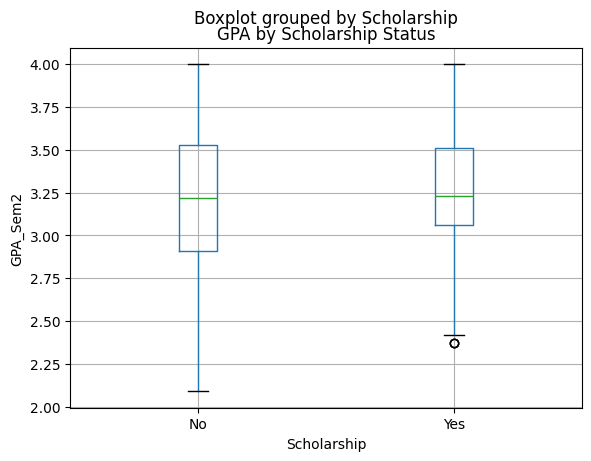

In [30]:
# 3. scholarships
# split into two groups
scholarship_students = student[student['Scholarship'] == 'Yes']
non_scholarship_students = student[student['Scholarship'] == 'No']

# calculate mean and sd for each group
print("Scholarship Students:")
print("Mean GPA:", scholarship_students['GPA_Sem2'].mean())
print("Std GPA:", scholarship_students['GPA_Sem2'].std())
print()

print("Non-Scholarship Students:")
print("Mean GPA:", non_scholarship_students['GPA_Sem2'].mean())
print("Std GPA:", non_scholarship_students['GPA_Sem2'].std())

student.boxplot(column='GPA_Sem2', by='Scholarship')
plt.title('GPA by Scholarship Status')
plt.xlabel('Scholarship')
plt.ylabel('GPA_Sem2')
plt.show()

Good Attendance (>= 90%): 3.166430707876371
Bad Attendance (< 90%): 3.2468992248062016


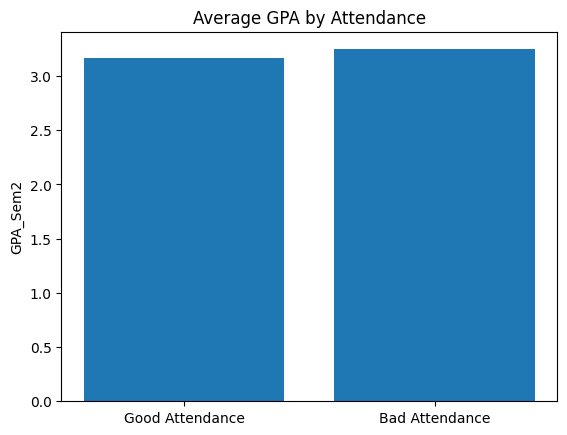

In [31]:
# 4. attendance
# split into two groups
good_attendance = student[student['AttendanceFlag'] == 1]
bad_attendance = student[student['AttendanceFlag'] == 0]

# average GPA for each group
print("Good Attendance (>= 90%):", good_attendance['GPA_Sem2'].mean())
print("Bad Attendance (< 90%):", bad_attendance['GPA_Sem2'].mean())

attendance_means = [good_attendance['GPA_Sem2'].mean(), bad_attendance['GPA_Sem2'].mean()]
labels = ['Good Attendance', 'Bad Attendance']

plt.bar(labels, attendance_means)
plt.title('Average GPA by Attendance')
plt.ylabel('GPA_Sem2')
plt.show()

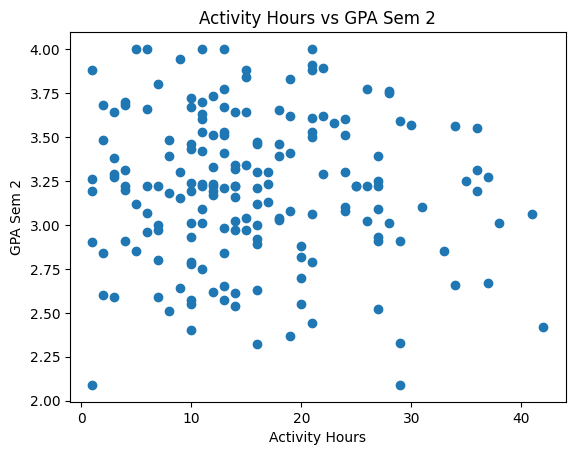

In [35]:
# 5. activity load
# get total activity hours per student
activity_hours = student_activities.groupby('StudentID')['HoursPerWeek'].sum().reset_index()

# merge data
merged_data = pd.merge(student_academic, activity_hours, on='StudentID', how='left')

# plot
plt.scatter(merged_data['HoursPerWeek'], merged_data['GPA_Sem2'])
plt.title('Activity Hours vs GPA Sem 2')
plt.xlabel('Activity Hours')
plt.ylabel('GPA Sem 2')
plt.show()


leaders mean: 3.214747058823529
leaders sd: 0.41972031993949926
non leaders mean: 3.204737076648841
non leaders sd: 0.41972031993949926


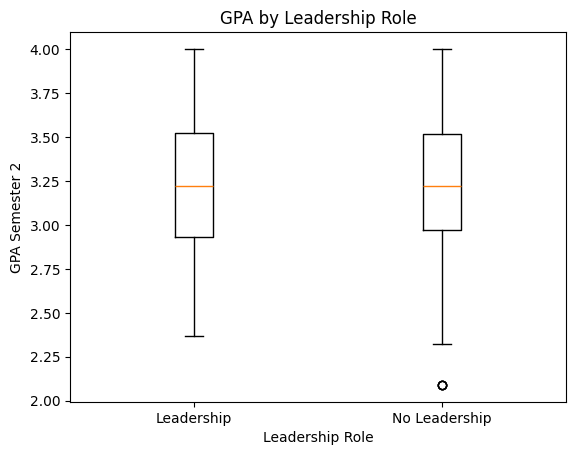

In [50]:
# 6. leadership
leaders = student[student['LeadershipRole'] == 'Yes']
non_leaders = student[student['LeadershipRole'] == 'No']

print(f"leaders mean: {leaders["GPA_Sem2"].mean()}")
print(f"leaders sd: {non_leaders["GPA_Sem2"].std()}")

print(f"non leaders mean: {non_leaders["GPA_Sem2"].mean()}")
print(f"non leaders sd: {non_leaders["GPA_Sem2"].std()}")

data = [leaders['GPA_Sem2'], non_leaders['GPA_Sem2']]
plt.boxplot(data, tick_labels=['Leadership', 'No Leadership'])
plt.title('GPA by Leadership Role')
plt.xlabel('Leadership Role')
plt.ylabel('GPA Semester 2')
plt.show()

Major
Biology             3.309244
Computer Science    3.195798
Economics           3.172284
English             3.250679
Psychology          3.194241
Name: GPA_Sem2, dtype: float64

Major
Biology             24.868897
Computer Science    23.250000
Economics           22.289154
English             23.166613
Psychology          22.991901
Name: Hours_Study, dtype: float64

Major
Biology             33.333333
Computer Science    41.071429
Economics           33.333333
English             41.025641
Psychology          46.774194
Name: Scholarship, dtype: float64


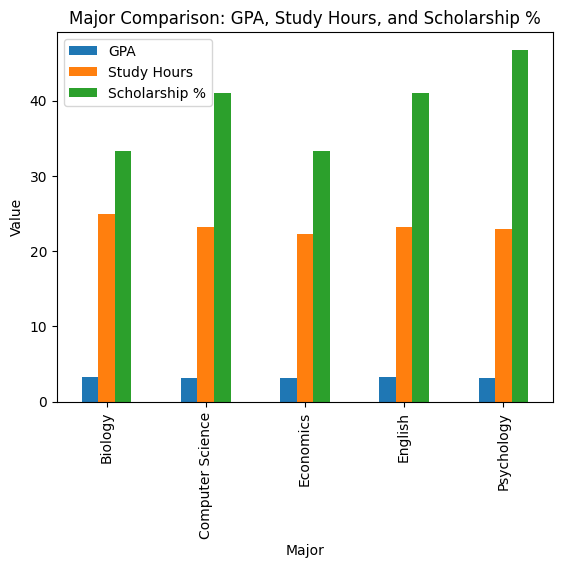

In [60]:
# 7. major comparison
# group all the majors
majors = unique_student.groupby("Major")

# get the GPA means for all the majors
mean_GPA = majors["GPA_Sem2"].mean()
print(mean_GPA)
print()

# get the study hours means for all the majors
mean_study = majors['Hours_Study'].mean()
print(mean_study)
print()

# get the scholarship percent

# get total number of students per major who have scholarships 
scholarship_count = majors['Scholarship'].apply(lambda x: (x == 'Yes').sum())

# get the total number of students in each major
total_students = majors['Scholarship'].count()

scholarship_percent = (scholarship_count / total_students) * 100
print(scholarship_percent)

# put all the info into a single df
major_comparison = pd.DataFrame({
    'GPA': mean_GPA,
    'Study Hours': mean_study,
    'Scholarship %': scholarship_percent
})

# plot
major_comparison.plot(kind='bar')

# title and labels
plt.title('Major Comparison: GPA, Study Hours, and Scholarship %')
plt.xlabel('Major')
plt.ylabel('Value')

plt.show()

In [ ]:
# 8. predictive index
# get z scores for GPA, attendance, and study hours
z_GPA = (unique_student['GPA_Sem2'] - unique_student['GPA_Sem2'].mean()) / unique_student['GPA_Sem2'].std()
z_Attendance = (unique_student['AttendanceRate'] - unique_student['AttendanceRate'].mean()) / unique_student['AttendanceRate'].std()
z_Study = (unique_student['Hours_Study'] - unique_student['Hours_Study'].mean()) / unique_student['Hours_Study'].std()

# get success score by summing the three z scores and add it as a col in unique_student
unique_student['SuccessScore'] = z_GPA + z_Attendance + z_Study

# list top 15 students by sorting based on success score and taking the first 15 rows
top_15 = unique_student[['StudentID', 'SuccessScore']].sort_values(by='SuccessScore', ascending=False).head(15)
print(top_15)

     StudentID  SuccessScore
17        1013      4.496494
49        1034      3.857897
211       1127      3.757668
156       1095      3.498700
64        1042      3.493915
238       1144      3.471757
300       1180      3.334616
107       1067      3.294961
13        1011      3.179419
152       1093      3.105351
52        1035      3.097336
304       1182      3.043573
379       1221      3.033233
284       1172      2.940932
97        1060      2.877465


C:\Users\William Gagnet\AppData\Local\Temp\ipykernel_30736\3093631717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_student['SuccessScore'] = z_GPA + z_Attendance + z_Study


---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

## Change me
* Bullet points  **boldface**